In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
#from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
%matplotlib inline

Using a predownloaded dataset instead of the link as the dataset is huge and there has been some download issues

In [2]:
#flightdata = pd.read_csv("https://introtomlsampledata.blob.core.windows.net/data/flightdelays/flightdelays.csv")
flightdata = pd.read_csv("data/flightdelays.csv")

In [3]:
print(flightdata.shape)
flightdata.columns

(1427653, 37)


Index(['Month', 'DayofMonth', 'DayOfWeek', 'Carrier', 'OriginAirportID',
       'DestAirportID', 'CRSDepTime', 'CRSArrTime', 'ArrDel15', 'Year',
       'AdjustedMonth', 'AdjustedDay', 'AirportID', 'AdjustedHour', 'Timezone',
       'Visibility', 'DryBulbFarenheit', 'DryBulbCelsius', 'DewPointFarenheit',
       'DewPointCelsius', 'RelativeHumidity', 'WindSpeed', 'Altimeter',
       'Year_R', 'AdjustedMonth_R', 'AdjustedDay_R', 'AirportID_R',
       'AdjustedHour_R', 'Timezone_R', 'Visibility_R', 'DryBulbFarenheit_R',
       'DryBulbCelsius_R', 'DewPointFarenheit_R', 'DewPointCelsius_R',
       'RelativeHumidity_R', 'WindSpeed_R', 'Altimeter_R'],
      dtype='object')

In [4]:
flightdata.dtypes

Month                    int64
DayofMonth               int64
DayOfWeek                int64
Carrier                 object
OriginAirportID          int64
DestAirportID            int64
CRSDepTime               int64
CRSArrTime               int64
ArrDel15                 int64
Year                     int64
AdjustedMonth            int64
AdjustedDay              int64
AirportID                int64
AdjustedHour             int64
Timezone                 int64
Visibility             float64
DryBulbFarenheit         int64
DryBulbCelsius         float64
DewPointFarenheit        int64
DewPointCelsius        float64
RelativeHumidity         int64
WindSpeed                int64
Altimeter              float64
Year_R                   int64
AdjustedMonth_R          int64
AdjustedDay_R            int64
AirportID_R              int64
AdjustedHour_R           int64
Timezone_R               int64
Visibility_R           float64
DryBulbFarenheit_R       int64
DryBulbCelsius_R       float64
DewPoint

In [5]:
flightdata.head(10)

,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,ArrDel15,Year,...,AdjustedHour_R,Timezone_R,Visibility_R,DryBulbFarenheit_R,DryBulbCelsius_R,DewPointFarenheit_R,DewPointCelsius_R,RelativeHumidity_R,WindSpeed_R,Altimeter_R
0,4,19,5,DL,11433,13303,8,1138,0,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04
1,4,19,5,DL,12478,13303,8,1118,0,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04
2,4,19,5,DL,12478,13303,8,1118,0,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04
3,4,19,5,DL,10397,13303,8,1041,0,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04
4,4,19,5,AA,10721,13303,8,1130,0,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04
5,4,19,5,EV,11042,13303,8,1126,1,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04
6,4,19,5,YV,12264,13303,8,1057,0,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04
7,4,19,5,AA,13930,13303,8,1235,0,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04
8,4,19,5,AA,13930,13303,8,1235,0,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04
9,4,19,5,AA,13204,13303,8,950,0,2013,...,8,-5,10.0,86,30.0,71,21.7,61,16,30.04


In [6]:
#flightdata.describe()
carrierlist = list(flightdata.Carrier.unique())
carrierlist.sort()
carrierdict = {carrierlist[i]: list(range(len(carrierlist)))[i] for i in range(len(carrierlist))} 
flightdata["Carrier"] = flightdata["Carrier"].replace(carrierdict) 
flightdata.Carrier.unique()

array([ 4,  1,  5, 15, 13, 10, 11, 14,  3,  9,  8, 12,  2,  7,  0,  6],
      dtype=int64)

In [7]:
train = flightdata[flightdata["Month"] < 10]
test = flightdata[flightdata["Month"] >= 10]
print(train.shape, test.shape)

(1230344, 37) (197309, 37)


In [8]:
train = train.drop(
    ["Month", "Year", "Year_R", "Timezone", "Timezone_R"], axis=1)
test = test.drop(["Month", "Year", "Year_R", "Timezone", "Timezone_R"], axis=1)
print(train.shape, test.shape)

(1230344, 32) (197309, 32)


In [9]:
trainX = train.drop(["ArrDel15"],axis = 1)
trainy = train["ArrDel15"]
print(trainX.shape,trainy.shape)

(1230344, 31) (1230344,)


In [10]:
testX = test.drop(["ArrDel15"],axis = 1)
testy = test["ArrDel15"]
print(testX.shape,testy.shape)

(197309, 31) (197309,)


In [11]:
model = LogisticRegression(solver="liblinear")
model.fit(trainX, trainy)
predicted_classes = model.predict(testX)
accuracy = metrics.accuracy_score(testy,predicted_classes)
parameters = model.coef_

In [12]:
accuracy

0.832810464803937

In [13]:
confusion = metrics.confusion_matrix(testy, model.predict(testX))
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[164072    478]
 [ 32510    249]]


In [14]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(testy, model.predict(testX)))

0.832810464803937
0.832810464803937


In [15]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(testy, model.predict(testX)))

0.16718953519606303
0.16718953519606305


In [16]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(testy, model.predict(testX)))

0.0076009646204096585
0.0076009646204096585


In [17]:
specificity = TN / (TN + FP)

print(specificity)

0.9970951078699484


In [18]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.002904892130051656
0.0029048921300516284


In [19]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(testy, model.predict(testX)))

0.3425034387895461
0.3425034387895461


Plotting the ROC curve

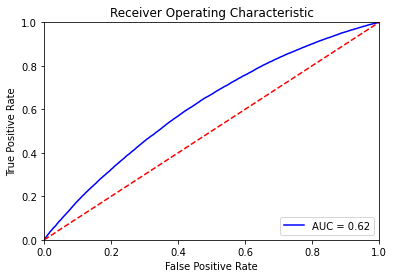

In [20]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(testX)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(testy, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(testy, preds))

0.6160948896988271
